In [1]:
import pandas as pd
import numpy as np
import datetime


In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

for col in train.columns:
    mode = train[col].mode()[0]
    test[col].fillna(mode, inplace=True)
    test2[col].fillna(mode, inplace=True)
    train[col].fillna(mode, inplace=True)       
    
train = train.append(test[test.x_exit==test.x_exit])
columns=[#'hash', 'trajectory_id', 
         'time_entry', 'time_exit', 
    'vmax', 'vmin','vmean', 
    'x_entry', 'y_entry', 'first', 'last',
       'x_req', 'y_req', 'x_start', 'y_start', 'distance', 'time_start',
       'time_delta', 'time_total', 'city_start', 'city_now', 'city_was',
       'x_dir', 'y_dir', 'len',
         'distance_to_city', 'speed',
    #'x_exit', 'y_exit', 
        ]
x_train, x_test = pd.DataFrame(), pd.DataFrame()
x_train = train[columns]
x_test = test2[columns]


y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017199 entries, 0 to 202936
Data columns (total 25 columns):
time_entry          1017199 non-null int64
time_exit           1017199 non-null int64
vmax                1017199 non-null float64
vmin                1017199 non-null float64
vmean               1017199 non-null float64
x_entry             1017199 non-null float64
y_entry             1017199 non-null float64
first               1017199 non-null bool
last                1017199 non-null bool
x_req               1017199 non-null float64
y_req               1017199 non-null float64
x_start             1017199 non-null float64
y_start             1017199 non-null float64
distance            1017199 non-null float64
time_start          1017199 non-null int64
time_delta          1017199 non-null int64
time_total          1017199 non-null int64
city_start          1017199 non-null bool
city_now            1017199 non-null bool
city_was            1017199 non-null bool
x_dir        

In [4]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017199 entries, 0 to 1017198
Data columns (total 1 columns):
y    1017199 non-null int64
dtypes: int64(1)
memory usage: 7.8 MB


In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

new_columns=['v','t','loc','s','road']
metric_columns=[['vmax', 'vmin','vmean'],
                ['time_entry', 'time_exit', 'time_start','time_delta', 'time_total'],
                ['city_start', 'city_now', 'city_was'],
                ['len','distance_to_city','distance'],
                ['x_entry','y_entry']
               ]

model_columns=[ MiniBatchKMeans(n_clusters=8,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=8,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=8,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=8,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                DBSCAN(eps=190,min_samples=40,n_jobs=-1)
              ]
for new,metric,model in zip(new_columns,metric_columns,model_columns):
    data=train[metric]
    trainend=np.shape(data)[0]
    data=data.append(test2[metric])

    for col in metric:
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace=True)
    c = model.fit_predict(data)

    labels=list(np.unique(c))
    clusters=len(labels)
    train_c=c[:trainend]
    test2_c=c[trainend:]
    x_train[new]=train_c
    x_test[new]=test2_c




Init 1/3 with method: k-means++
Inertia for init 1/3: 19728.895517
Init 2/3 with method: k-means++
Inertia for init 2/3: 20214.865553
Init 3/3 with method: k-means++
Inertia for init 3/3: 21203.222630
Minibatch iteration 1/105100: mean batch inertia: 1.639668, ewa inertia: 1.639668 
Minibatch iteration 2/105100: mean batch inertia: 1.481560, ewa inertia: 1.639367 
Minibatch iteration 3/105100: mean batch inertia: 1.573076, ewa inertia: 1.639241 
Minibatch iteration 4/105100: mean batch inertia: 1.398290, ewa inertia: 1.638783 
Minibatch iteration 5/105100: mean batch inertia: 1.626232, ewa inertia: 1.638759 
Minibatch iteration 6/105100: mean batch inertia: 1.349452, ewa inertia: 1.638208 
Minibatch iteration 7/105100: mean batch inertia: 1.772196, ewa inertia: 1.638463 
Minibatch iteration 8/105100: mean batch inertia: 1.485594, ewa inertia: 1.638172 
Minibatch iteration 9/105100: mean batch inertia: 1.258959, ewa inertia: 1.637450 
Minibatch iteration 10/105100: mean batch inertia: 1

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 260216837838.546631
Init 2/3 with method: k-means++
Inertia for init 2/3: 301653749222.480103
Init 3/3 with method: k-means++
Inertia for init 3/3: 263055528850.676453
Minibatch iteration 1/105100: mean batch inertia: 84750219.014000, ewa inertia: 84750219.014000 
Minibatch iteration 2/105100: mean batch inertia: 84509343.369332, ewa inertia: 84749760.515464 
Minibatch iteration 3/105100: mean batch inertia: 82377473.838388, ewa inertia: 84745244.949060 
Minibatch iteration 4/105100: mean batch inertia: 85021060.970697, ewa inertia: 84745769.955407 
Minibatch iteration 5/105100: mean batch inertia: 85963130.545065, ewa inertia: 84748087.159576 
Minibatch iteration 6/105100: mean batch inertia: 84063806.951528, ewa inertia: 84746784.655647 
Minibatch iteration 7/105100: mean batch inertia: 79345209.665543, ewa inertia: 84736502.942737 
Minibatch iteration 8/105100: mean batch inertia: 82397218.587644, ewa inertia: 84732050.195122 
Mi

Minibatch iteration 129/105100: mean batch inertia: 81240259.936343, ewa inertia: 84488499.031917 
Minibatch iteration 130/105100: mean batch inertia: 79249046.508754, ewa inertia: 84478525.913567 
Minibatch iteration 131/105100: mean batch inertia: 82624024.311160, ewa inertia: 84474995.933311 
Minibatch iteration 132/105100: mean batch inertia: 82689658.889773, ewa inertia: 84471597.605423 
Minibatch iteration 133/105100: mean batch inertia: 82802717.906631, ewa inertia: 84468420.950100 
Minibatch iteration 134/105100: mean batch inertia: 82667829.929417, ewa inertia: 84464993.586789 
Minibatch iteration 135/105100: mean batch inertia: 80525498.694357, ewa inertia: 84457494.893247 
Minibatch iteration 136/105100: mean batch inertia: 84092670.202061, ewa inertia: 84456800.461948 
Minibatch iteration 137/105100: mean batch inertia: 86349914.095749, ewa inertia: 84460403.938883 
Minibatch iteration 138/105100: mean batch inertia: 82766237.917950, ewa inertia: 84457179.151912 
Minibatch 

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 0.000000
Init 2/3 with method: k-means++
Inertia for init 2/3: 0.000000
Init 3/3 with method: k-means++
Inertia for init 3/3: 0.000000
Minibatch iteration 1/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 2/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 3/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 4/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 5/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 6/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 7/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 8/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
Minibatch iteration 9/105100: mean batch inertia: 0.000000, ewa inertia: 0.000000 
[MiniBatchKMeans] Reassigning 5 cluster centers.
Minibatch itera

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 14973772767484.972656
Init 2/3 with method: k-means++
Inertia for init 2/3: 14748643609931.628906
Init 3/3 with method: k-means++
Inertia for init 3/3: 15027460386282.625000
Minibatch iteration 1/105100: mean batch inertia: 4717134329.867654, ewa inertia: 4717134329.867654 
Minibatch iteration 2/105100: mean batch inertia: 4761468688.716875, ewa inertia: 4717218718.800617 
Minibatch iteration 3/105100: mean batch inertia: 4892078075.907373, ewa inertia: 4717551557.595356 
Minibatch iteration 4/105100: mean batch inertia: 4514603561.619717, ewa inertia: 4717165253.038981 
Minibatch iteration 5/105100: mean batch inertia: 4727372235.376472, ewa inertia: 4717184681.680120 
Minibatch iteration 6/105100: mean batch inertia: 4943180407.125058, ewa inertia: 4717614856.799815 
Minibatch iteration 7/105100: mean batch inertia: 4633548464.260087, ewa inertia: 4717454839.302131 
Minibatch iteration 8/105100: mean batch inertia: 4316569091.8572

In [6]:
x_train.head()

,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,first,last,x_req,...,x_dir,y_dir,len,distance_to_city,speed,v,t,loc,s,road
0,25471,25712,0.0,0.0,0.0,3.751014e+06,-1.909398e+07,True,False,3.751014e+06,...,-687.954453,-42359.276973,1,434887.327822,0.061748,0,3,1,3,-1
1,26434,26742,0.0,0.0,0.0,3.743937e+06,-1.932247e+07,False,False,3.751014e+06,...,-687.954453,-42359.276973,2,251259.147958,179.855597,0,3,1,1,-1
2,28412,29005,0.0,0.0,0.0,3.744868e+06,-1.929356e+07,False,False,3.743937e+06,...,1037.497654,2803.848719,3,164759.949137,72.867591,0,3,1,1,0
3,29870,31043,0.0,0.0,0.0,3.744880e+06,-1.929229e+07,False,False,3.744868e+06,...,-52.320161,723.769955,4,160951.840984,46.444595,0,3,1,1,0
4,52689,52689,0.0,0.0,0.0,3.744909e+06,-1.928558e+07,False,False,3.744880e+06,...,-71.244474,1803.169939,5,140948.372163,9.754358,0,6,1,7,1


In [7]:
def plot_clusters(col):
    data=train[['x_entry','y_entry']]
    data['c']=x_train[col]

    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)
    
    labels=list(np.unique(data['c'].values))
    
    # Plot
    for c in labels:
        ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5,label=str('c'+str(c)))

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=col)

    plt.show()
city_sqrt = [within_measure(x, y) for x,y in zip(test2.x_entry.values,test2.y_entry.values)]

In [8]:
def plotmap(ycity,title):
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)

    df=test2[['x_entry','y_entry']]
    df['sqrt']=city_sqrt
    df['target']=ycity
    #df=df[df.sqrt==0]
    leg=['Outside','City']
    # Plot
    for data in [df[df.target==1]]:
        ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=title)
    ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
    plt.show()

In [9]:
#for col in x_train.columns:
    #plot_clusters(col)

In [25]:
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from random import randint




def trainder(seed=0):
    
    rf = RandomForestClassifier(
            bootstrap=True, 
            class_weight=None, 
            criterion='gini',
            max_depth=20, 
            #max_features='auto', 
            #max_leaf_nodes=128,
            #min_impurity_decrease=0.0, 
            #min_impurity_split=4,
            #min_samples_leaf=16, 
            #min_samples_split=8,
            #min_weight_fraction_leaf=0.0, 
            n_estimators=224, n_jobs=-1,
            oob_score=False, random_state=seed, verbose=True, warm_start=False)
    
    
    
    #Learning
    rf.fit(x_train,y_train.values.reshape(-1,1))
    
    #Prediction
    target=list(rf.predict_proba(x_test)[:,1])
    score = f1_score(y_train,rf.predict(x_train))
    print(seed,':',score)
    return target, score

size = 1

city_lgbm_proba = []
city_lgbm_score = []


seeds = []

for i in range(size):
    s = randint(0,2**32 - 1)
    seeds.append(s)
    proba, score = trainder(seed=s)
    city_lgbm_proba.append(proba)
    city_lgbm_score.append(score)
print(seeds)

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:  4.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 224 out of 224 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   10.5s

3971294361 : 0.9485932403735101
[3971294361]


In [28]:

lgbm=pd.DataFrame()
for i in range(size):
    lgbm[str(i)]=city_lgbm_proba[i]
#lgbm.to_csv('./output/class/9_2kp.csv',index=False)    
lgbm[:20]

,0
0,0.014109
1,0.000915
2,0.733572
3,0.009129
4,0.043469
5,0.005588
6,0.725328
7,0.000488
8,0.608880
9,0.109194


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


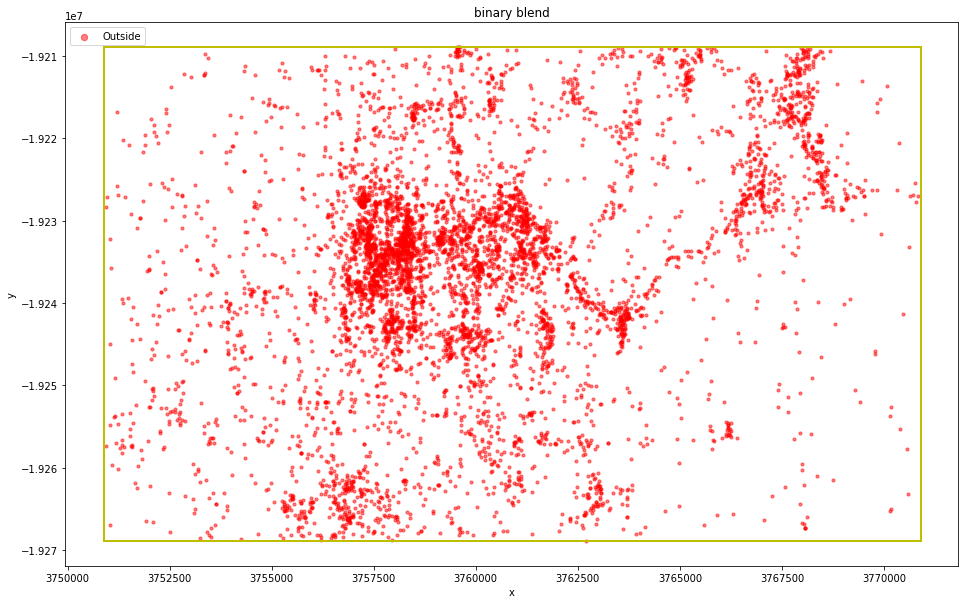

In [29]:

#best = pd.read_csv('./output/submission/lgbm_800.csv').target.values
best2 = pd.read_csv('./output/submission/lgbm_blended_2.csv').target.values
city=lgbm.copy()
for col in city.columns:
    city[col]=np.round(city[col].values)
#city['best']=best
#city['best2']=best2
city['target']=np.zeros(len(city))
for col in city.columns:
    city['target']=city['target']+city[col]

def fnc(x):
    if x>=1:
        return 1
    else:
        return 0
city=[fnc(x) for x in city.target.values]

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/tree/1.csv',index=False)    
submission[:20]

plotmap(city,'binary blend')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


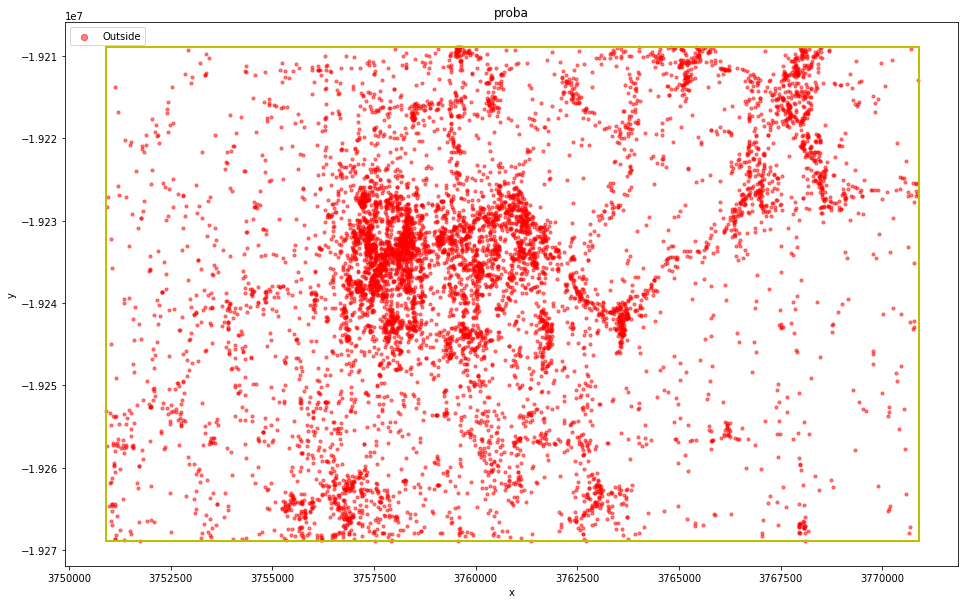

In [23]:
city=lgbm.copy()

target=np.zeros(len(city))
i=0
for col in city.columns:
    target += lgbm[col]
    i += 1
city['target']=target
city['target']/=i

city=np.round(city.target.values)

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/tree/proba.csv',index=False)    
submission[:20]

plotmap(city,'proba')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


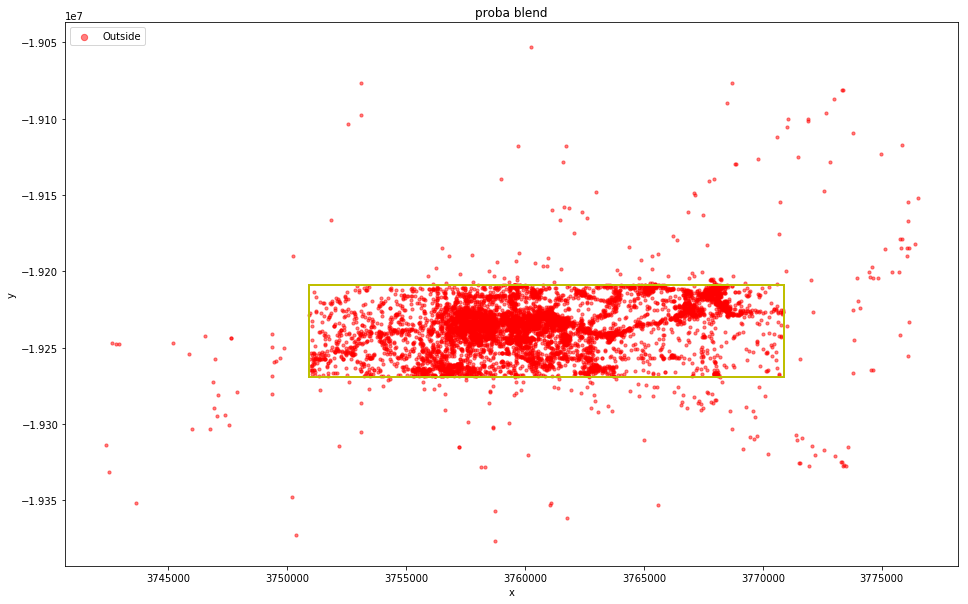

In [24]:
city=lgbm.copy()
target=np.zeros(len(city))
i=0
for col in city.columns:
    target += lgbm[col]
    i += 1
    
target += pd.read_csv('./output/submission/lgbm_blended_2.csv').target.values
i += 1
city['target']=target
city['target']/=i

city=np.round(city.target.values)

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/tree/blend_proba.csv',index=False)    
submission[:20]

plotmap(city,'proba blend')